In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import seaborn as sns

In [2]:
sz = 1795*2
Z = np.zeros((sz-1, 4))
grps = { i: (1, 0) for i in range(sz) }
for i in range(sz-1):
    a, b = tuple(np.random.choice(list(grps.keys()), 2, False))
    a_s, a_d = grps[a]
    b_s, b_d = grps[b]
    del grps[a]
    del grps[b]
    d = a_d + b_d + np.random.normal()**2
    s = a_s + b_s
    grps[sz + i] = (s, d)
    Z[i] = [a, b, d, s]
l = Z


/var/folders/fz/l55ysstj2xz0ztbjc3m17db00000gq/T/ipykernel_63089/338415192.py:17: RuntimeWarning: divide by zero encountered in power
  (8e7*(A[:,1]-725.)**(-2) < np.random.uniform(sz))


(0.0, 35900.0)

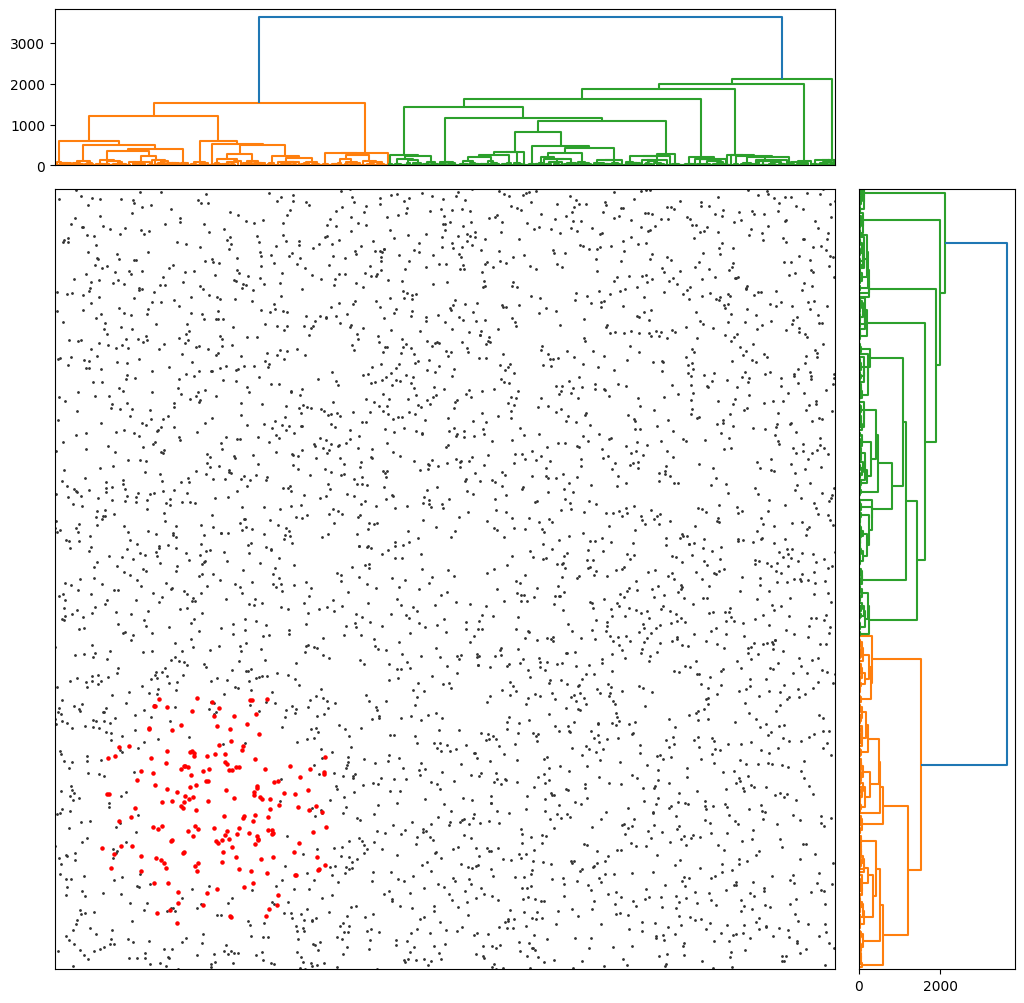

In [3]:
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(2, 2,  width_ratios=(5, 1), height_ratios=(1, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
axh = fig.add_subplot(gs[0, 0], sharex=ax)
axv = fig.add_subplot(gs[1, 1], sharey=ax)
da = hierarchy.dendrogram(l, no_labels=True, ax=axh, orientation='top')
db = hierarchy.dendrogram(l, no_labels=True, ax=axv, orientation='right')
cnva = { i: int(j) for i, j in enumerate(da["ivl"])}
cnvb = { i: int(j) for i, j in enumerate(db["ivl"])}
A = np.vectorize(cnva.get)(np.arange(sz).reshape(-1, 2))
B = np.vectorize(cnvb.get)(np.arange(sz).reshape(-1, 2))
c = 10
sel = (
    (8e7*(A[:,0]-725.)**(-2) < np.random.uniform(sz)) |
    (8e7*(A[:,1]-725.)**(-2) < np.random.uniform(sz))
)
ax.scatter(A[sel, 0]*c, B[sel, 1]*c, s=1, color="#333")
ax.scatter(A[sel, 1]*c, B[sel, 0]*c, s=1, color="#333")
ax.scatter(A[~sel, 0]*c, B[~sel, 1]*c, s=5, color="#f00")
ax.scatter(A[~sel, 1]*c, B[~sel, 0]*c, s=5, color="#f00")
ax.get_xlim()